## Importing All Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [2]:
df = pd.read_csv('multiclass.csv')

In [3]:
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [4]:
# display rows and columns
df.shape

(440, 8)

#### Summary of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


As there are no categorical columns, therefore no encoding will be needed

#### Missing Value Check

In [44]:
df.isna().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64

#### Visualizing the target variable

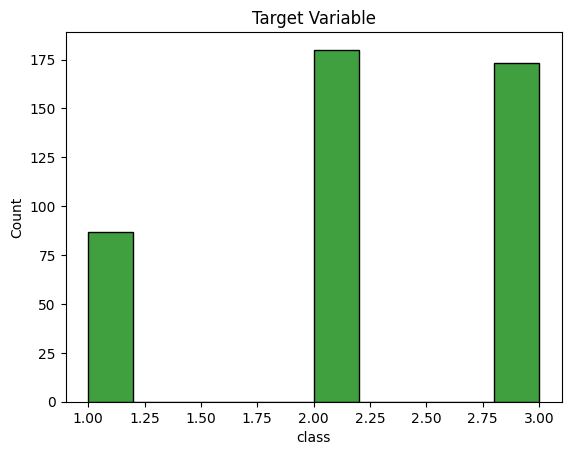

In [45]:
sns.histplot(x='class', data=df, color='green')
plt.title('Target Variable')
plt.show()

In [8]:
df['class'].value_counts()

class
2    180
3    173
1     87
Name: count, dtype: int64

#### Dividing the dataset into features and target attributes

In [46]:
X = df.drop('class', axis=1)
X

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [10]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [11]:
y = df['class']

In [12]:
y.head()

0    2
1    2
2    2
3    1
4    1
Name: class, dtype: int64

#### Splitting the dataset into train, validation and test data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [16]:
X_train.shape, y_train.shape

((281, 7), (281,))

In [17]:
X_val.shape, y_val.shape

((71, 7), (71,))

In [18]:
X_test.shape, y_test.shape

((88, 7), (88,))

In [19]:
y_train.value_counts()

class
2    115
3    110
1     56
Name: count, dtype: int64

#### Balancing the imbalanced dataset

In [20]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [21]:
X_sm

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,2427,7097,10391,1127,4314,1468
1,2,9790,1786,5109,3570,182,1043
2,2,9155,1897,5167,2714,228,1113
3,3,3097,4230,16483,575,241,2080
4,3,514,7677,19805,937,9836,716
...,...,...,...,...,...,...,...
340,1,2862,5510,6409,2275,4754,574
341,2,3382,2305,1983,1415,1001,673
342,1,7209,1012,2463,1077,290,1496
343,3,2943,1229,1893,5103,333,829


In [22]:
y_sm

0      2
1      3
2      3
3      2
4      2
      ..
340    3
341    3
342    3
343    3
344    3
Name: class, Length: 345, dtype: int64

In [23]:
y_sm.value_counts()

class
2    115
3    115
1    115
Name: count, dtype: int64

#### Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_sm = scaler.fit_transform(X_sm)

In [27]:
X_sm

array([[-1.69424483, -0.92138851,  0.25284924, ..., -0.38387974,
         0.32296897, -0.00282856],
       [-0.48155922, -0.24744494, -0.45129909, ...,  0.13997403,
        -0.51024857, -0.14628692],
       [-0.48155922, -0.30556719, -0.43658238, ..., -0.0435785 ,
        -0.50097268, -0.12265848],
       ...,
       [-1.69424483, -0.48368674, -0.55391834, ..., -0.39460126,
        -0.48847038,  0.00662281],
       [ 0.7311264 , -0.87415845, -0.52514783, ...,  0.46869602,
        -0.47979943, -0.21852242],
       [-1.69424483, -0.26108307, -0.388057  , ..., -0.47715701,
        -0.47556478, -0.3724448 ]])

In [28]:
X_val = scaler.transform(X_val)

In [29]:
X_val[:10]

array([[ 0.7311264 , -1.12522829,  2.74076929,  1.21308095, -0.48594866,
         1.22212604,  1.61133111],
       [ 0.7311264 , -0.37906668, -0.31420827, -0.62466084, -0.45850156,
        -0.4146665 , -0.44974354],
       [-1.69424483, -0.68212618, -0.54026229, -0.46958929,  0.98182826,
        -0.49532648, -0.3717697 ],
       [-0.48155922,  0.89953141, -0.2617054 , -0.60938188, -0.15208034,
        -0.51105517,  0.37995209],
       [-1.69424483, -0.92898559,  0.72762897, -0.37315323, -0.31697741,
        -0.23116506, -0.33295156],
       [ 0.7311264 , -0.91964942,  0.27446027, -0.35678292,  0.63316423,
        -0.38804871,  0.54636378],
       [ 0.7311264 , -0.94893937, -0.25202684, -0.42742332, -0.29639208,
        -0.49956113,  0.9750511 ],
       [ 0.7311264 , -0.92907712,  0.35202132,  0.42512299, -0.61439255,
         0.29917428,  0.07447017],
       [-1.69424483, -0.13010206,  0.10594727, -0.19585773,  1.15873344,
        -0.35437317,  0.22299177],
       [-0.48155922, -0.0634

In [30]:
X_test = scaler.transform(X_test)

In [31]:
X_test[:10]

array([[-1.69424483, -0.60267718,  2.43118798,  0.60618863,  1.55199902,
        -0.37957941,  0.72897783],
       [ 0.7311264 , -0.15811058, -0.53230731, -0.54786917, -0.17609656,
        -0.48625223, -0.44197991],
       [ 0.7311264 ,  1.3625873 ,  0.26438396,  0.46847953, -0.0232076 ,
         0.3848755 , -0.15337545],
       [-1.69424483,  1.75013002, -0.62325925, -0.60461961,  0.06964082,
        -0.52456572, -0.29075792],
       [-0.48155922, -1.09392465, -0.56890022, -0.58785243, -0.5367687 ,
        -0.52920367, -0.32214999],
       [ 0.7311264 , -0.59233416, -0.24340894, -0.4294076 , -0.08796562,
        -0.50419907, -0.26679194],
       [ 0.7311264 , -1.11360384, -0.56638114, -0.28564644, -0.60967508,
        -0.47959778, -0.49463756],
       [ 0.7311264 , -0.19508914,  0.53591395,  0.33930284, -0.46750764,
         0.16628697,  0.29218933],
       [ 0.7311264 , -0.20167938, -0.42544541, -0.53149885, -0.40296405,
        -0.51307167,  0.21894118],
       [ 0.7311264 , -0.5134

#### Modeling

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Randomly chosing the value of k

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_sm, y_sm)

KNeighborsClassifier(metric='euclidean')

In [34]:
# knn score metric uses the same score metric calculated in Classification problem

round(knn.score(X_val, y_val)*100,2)

91.55

#### Hyperparameter Tuning

In [35]:
Score_list = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_sm, y_sm)
    scr = knn.score(X_val, y_val)
    Score_list.append(scr)

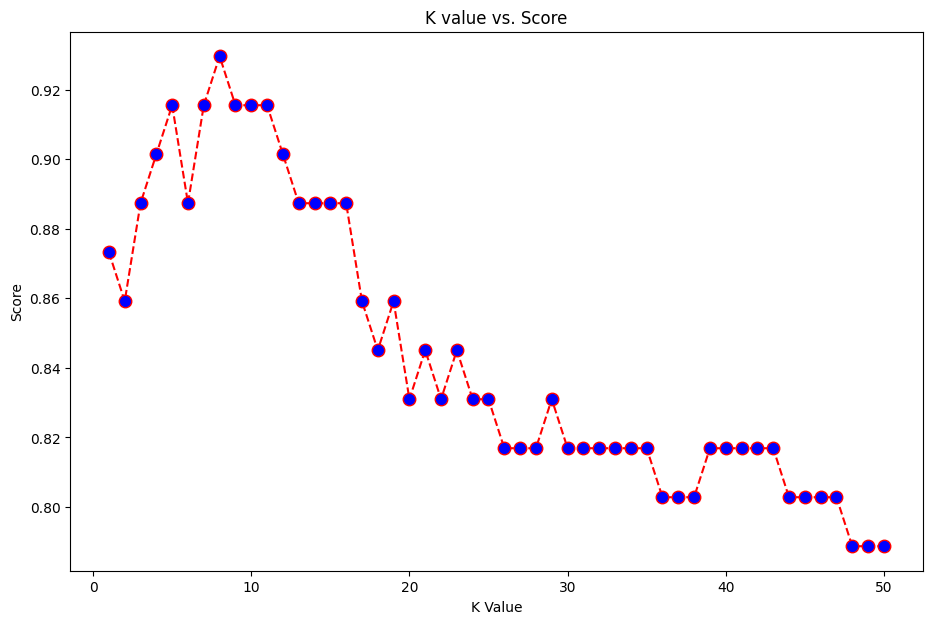

In [36]:
plt.figure(figsize=(11,7))
plt.plot(range(1,51), Score_list, color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=9)
plt.title('K value vs. Score')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.show()

From the above plot it can be seen that k=7 gives better accuracy, therefore retraining the model using this value

In [37]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_sm, y_sm)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [38]:
score = round(knn.score(X_val, y_val)*100,2)
score

91.55

Accuracy increases with k=7

Taking predictions on unseen data

In [39]:
y_pred = knn.predict(X_test)

In [40]:
print("Actual values:", y_test)

Actual values: 265    2
78     3
347    2
255    2
327    3
      ..
57     2
137    2
24     2
17     3
66     3
Name: class, Length: 88, dtype: int64


In [41]:
print("Predicted values:", y_pred)

Predicted values: [2 3 2 1 3 3 3 2 3 3 3 1 2 3 2 3 1 2 1 3 2 2 1 3 1 1 1 1 3 3 2 2 1 2 1 3 3
 2 2 3 3 3 3 3 2 1 2 2 2 1 2 3 3 1 2 3 2 3 2 2 1 3 2 2 2 2 2 2 3 1 2 3 3 3
 3 2 2 1 2 3 3 3 1 2 3 2 3 3]


#### Visualisation of Actual vs. Predicted

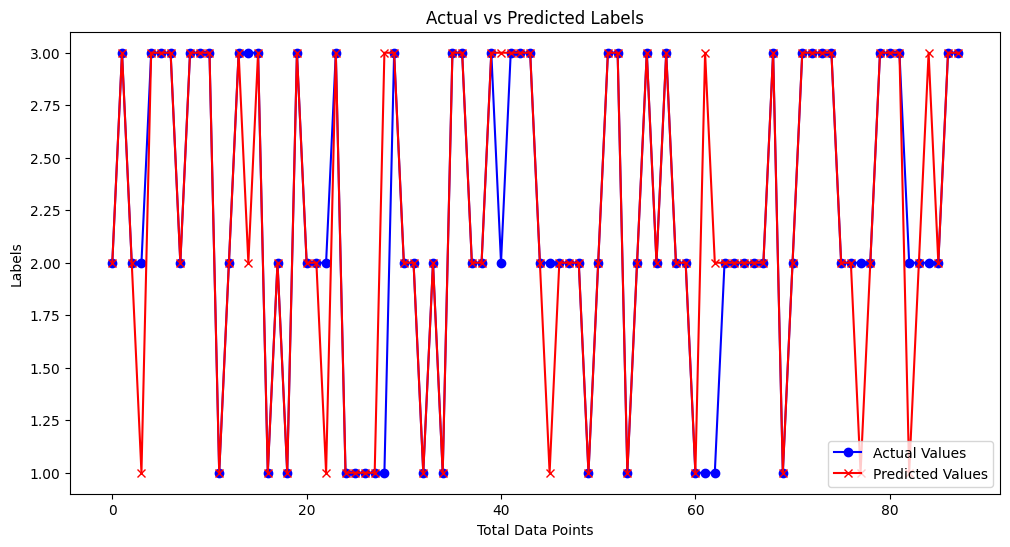

In [42]:
rows = np.arange(len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(rows, y_test, marker='o', color='b', label='Actual Values')
plt.plot(rows, y_pred, marker='x', color='r', label='Predicted Values')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Total Data Points')
plt.ylabel('Labels')
plt.legend()
plt.show()